Đầu tiên, tách từ và phân đoạn văn bản tiếng Việt bằng underthesea

In [1]:
!pip install underthesea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.4/978.4 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/NLP/'

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv(data_dir + 'data_10k_balanced.csv')
df.head(10)

,texts,labels,texts_tok,tokens,texts_norm,text_clean
0,thanh niên thời nay toàn game gủng bay lắc ăn ...,1,Thanh_niên thời nay toàn game gủng bay lắc ăn_...,"['Thanh_niên', 'thời', 'nay', 'toàn', 'game', ...",Thanh niên thời nay toàn game gủng bay lắc ăn ...,thanh niên thời nay toàn game gủng bay lắc ăn ...
1,cán bộ là nhàn mẹ nhất lương thấp nhưng đúng n...,0,Cán_bộ là nhàn mẹ nhất Lương_thấp nhưng đúng n...,"['Cán_bộ', 'là', 'nhàn', 'mẹ', 'nhất', 'Lương_...",Cán bộ là nhàn mẹ nhất Lương thấp nhưng đúng n...,cán bộ là nhàn mẹ nhất lương thấp nhưng đúng n...
2,không bị đắng hả bác chỉ em với,0,"không bị đắng hả bác , chỉ em với","['không', 'bị', 'đắng', 'hả', 'bác', 'chỉ', 'e...","không bị đắng hả bác, chỉ em với",không bị đắng hả bác chỉ em với
3,sáng ra đã nhậu nhất các thím này,0,"Sáng ra đã nhậu , nhất các thím này","['Sáng', 'ra', 'đã', 'nhậu', 'nhất', 'các', 't...","Sáng ra đã nhậu, nhất các thím này",sáng ra đã nhậu nhất các thím này
4,có xem ko mà phát biểu liều h2 saka có tình hu...,0,Có xem ko mà phát_biểu liều . H2_Saka có tình_...,"['Có', 'xem', 'ko', 'mà', 'phát_biểu', 'liều',...",Có xem không mà phát biểu liều. H2 Saka có tìn...,có xem ko mà phát biểu liều h2 saka có tình hu...
5,đời tao ghét mấy con chó như thế này làm cái đ...,1,Đời tao ghét mấy con chó như thế_này . Làm cái...,"['Đời', 'tao', 'ghét', 'mấy', 'con', 'chó', 'n...",Đời tao ghét mấy cac\tcon cặc chó như thế này....,đời tao ghét mấy con chó như thế này làm cái đ...
6,ừ nhưng k mang khẩu trang là phạt,0,"Ừ , nhưng k mang khẩu_trang là phạt","['Ừ', 'nhưng', 'k', 'mang', 'khẩu_trang', 'là'...","Ừ , nhưng không mang khẩu trang là phạt",ừ nhưng k mang khẩu trang là phạt
7,tụi nó không chịu chạy các fen ạ đợi bóng đến ...,1,tụi nó không chịu chạy các fen ạ . Đợi bóng đế...,"['tụi', 'nó', 'không', 'chịu', 'chạy', 'các', ...",tụi nó không chịu chạy các friend ạ. Đợi bóng ...,tụi nó không chịu chạy các fen ạ đợi bóng đến ...
8,** mẹ lại xứ lờ bắc giang,1,* * mẹ lại xứ_lờ bắc_giang,"['*', '*', 'mẹ', 'lại', 'xứ_lờ', 'bắc_giang']",** mẹ lại xứ lờ bắc giang,** mẹ lại xứ lờ bắc giang
9,trù ếm juv dog die thua trắng ​,0,trù ếm juv dog die thua trắng ​,"['trù', 'ếm', 'juv', 'dog', 'die', 'thua', 'tr...",trù ếm juv dog die thua trắng ​,trù ếm juv dog die thua trắng ​


Lowercase + bỏ dấu câu không cần thiết

In [4]:
import re
import pandas as pd
import os

def basic_clean(text):
    if pd.isna(text):
        return ""
    text = str(text)

    # 1. đưa về chữ thường
    text = text.lower()

    # 2. bỏ/bthay các dấu câu: ! ' _ - . , ? ... thành khoảng trắng
    #   (có thể thêm/bớt ký tự trong [] tuỳ bạn)
    text = re.sub(r"[!\"'_,\-\.?/:;(){}\[\]…]", " ", text)

    # 3. gom nhiều khoảng trắng về 1
    text = re.sub(r"\s+", " ", text).strip()

    return text

df["texts"] = df["texts"].apply(basic_clean)
df.to_csv(data_dir + "data_10k_balanced.csv", index=False)
df[["texts", "labels"]].head(10)

,texts,labels
0,thanh niên thời nay toàn game gủng bay lắc ăn ...,1
1,cán bộ là nhàn mẹ nhất lương thấp nhưng đúng n...,0
2,không bị đắng hả bác chỉ em với,0
3,sáng ra đã nhậu nhất các thím này,0
4,có xem ko mà phát biểu liều h2 saka có tình hu...,0
5,đời tao ghét mấy con chó như thế này làm cái đ...,1
6,ừ nhưng k mang khẩu trang là phạt,0
7,tụi nó không chịu chạy các fen ạ đợi bóng đến ...,1
8,** mẹ lại xứ lờ bắc giang,1
9,trù ếm juv dog die thua trắng ​,0


Lọc teen code sơ qua

In [5]:
import os

teencode_path = os.path.join(data_dir, "teencode.txt")

teen_dict = {}

with open(teencode_path, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        # tách theo khoảng trắng, chỉ tách 1 lần
        parts = line.split('\t', 1)
        if len(parts) != 2:
            continue
        slang, standard = parts
        teen_dict[slang.lower()] = standard.strip()

print("Số mục teencode:", len(teen_dict))
list(teen_dict.items())[:10]


Số mục teencode: 408


[('ctrai', 'con trai'),
 ('khôg', 'không'),
 ('bme', 'bố mẹ'),
 ('cta', 'chúng ta'),
 ('mih', 'mình'),
 ('mqh', 'mối quan hệ'),
 ('cgai', 'con gái'),
 ('nhữg', 'những'),
 ('mng', 'mọi người'),
 ('svtn', 'sinh viên tình nguyện')]

In [6]:
import string
import pandas as pd

PUNCT = ".,!?;:()\"'“”…"

def normalize_teencode_raw(text, mapping):
    if pd.isna(text):
        return ""
    words = str(text).split()
    new_words = []

    for w in words:
        # tách dấu câu ở đầu/cuối, giữ lại để gắn lại sau
        prefix = ""
        suffix = ""
        core = w

        # dấu ở đầu
        while core and core[0] in PUNCT:
            prefix += core[0]
            core = core[1:]

        # dấu ở cuối
        while core and core[-1] in PUNCT:
            suffix = core[-1] + suffix
            core = core[:-1]

        if not core:
            # chỉ toàn dấu câu
            new_words.append(prefix + suffix)
            continue

        key = core.lower()
        if key in mapping:
            repl = mapping[key]          # vd: "bme" -> "bố mẹ"
        else:
            repl = core

        # ghép lại: prefix + từ chuẩn + suffix
        new_words.append(prefix + repl + suffix)

    return " ".join(new_words)

df["texts"] = df["texts"].apply(lambda x: normalize_teencode_raw(x, teen_dict))
df[["texts", "labels"]].head(10)


,texts,labels
0,thanh niên thời nay toàn game gủng bay lắc ăn ...,1
1,cán bộ là nhàn mẹ nhất lương thấp nhưng đúng n...,0
2,không bị đắng hả bác chỉ em với,0
3,sáng ra đã nhậu nhất các thím này,0
4,có xem không mà phát biểu liều h2 saka có tình...,0
5,đời tao ghét mấy con chó như thế này làm cái đ...,1
6,ừ nhưng không mang khẩu trang là phạt,0
7,tụi nó không chịu chạy các friend ạ đợi bóng đ...,1
8,** mẹ lại xứ lờ bắc giang,1
9,trù ếm juv dog die thua trắng ​,0


In [7]:
from underthesea import word_tokenize

def tokenize_vn(text):
  if pd.isna(text):
    return ""
  return word_tokenize(text, format="text")
df["texts_tok"] = df["texts"].apply(tokenize_vn)
df[["texts", "texts_tok", "labels"]].head(10)

,texts,texts_tok,labels
0,thanh niên thời nay toàn game gủng bay lắc ăn ...,thanh_niên thời nay toàn game gủng bay lắc ăn_...,1
1,cán bộ là nhàn mẹ nhất lương thấp nhưng đúng n...,cán_bộ là nhàn mẹ nhất lương thấp nhưng đúng n...,0
2,không bị đắng hả bác chỉ em với,không bị đắng hả bác chỉ em với,0
3,sáng ra đã nhậu nhất các thím này,sáng ra đã nhậu nhất các thím này,0
4,có xem không mà phát biểu liều h2 saka có tình...,có xem không mà phát_biểu liều h2_saka có tình...,0
5,đời tao ghét mấy con chó như thế này làm cái đ...,đời tao ghét mấy con chó như thế_này làm cái đ...,1
6,ừ nhưng không mang khẩu trang là phạt,ừ nhưng không mang khẩu_trang là phạt,0
7,tụi nó không chịu chạy các friend ạ đợi bóng đ...,tụi nó không chịu chạy các friend ạ đợi bóng đ...,1
8,** mẹ lại xứ lờ bắc giang,* * mẹ lại xứ_lờ bắc_giang,1
9,trù ếm juv dog die thua trắng ​,trù ếm juv dog die thua trắng ​,0


In [8]:
import re
import pandas as pd

def to_tokens(tok_text):
    if pd.isna(tok_text):
        return []
    tokens = str(tok_text).split()
    return tokens

df["tokens"] = df["texts_tok"].apply(to_tokens)

df.to_csv(data_dir + "data_10k_tok.csv", index=False)
df[["texts", "texts_tok", "tokens", "labels"]].head(10)

,texts,texts_tok,tokens,labels
0,thanh niên thời nay toàn game gủng bay lắc ăn ...,thanh_niên thời nay toàn game gủng bay lắc ăn_...,"[thanh_niên, thời, nay, toàn, game, gủng, bay,...",1
1,cán bộ là nhàn mẹ nhất lương thấp nhưng đúng n...,cán_bộ là nhàn mẹ nhất lương thấp nhưng đúng n...,"[cán_bộ, là, nhàn, mẹ, nhất, lương, thấp, nhưn...",0
2,không bị đắng hả bác chỉ em với,không bị đắng hả bác chỉ em với,"[không, bị, đắng, hả, bác, chỉ, em, với]",0
3,sáng ra đã nhậu nhất các thím này,sáng ra đã nhậu nhất các thím này,"[sáng, ra, đã, nhậu, nhất, các, thím, này]",0
4,có xem không mà phát biểu liều h2 saka có tình...,có xem không mà phát_biểu liều h2_saka có tình...,"[có, xem, không, mà, phát_biểu, liều, h2_saka,...",0
5,đời tao ghét mấy con chó như thế này làm cái đ...,đời tao ghét mấy con chó như thế_này làm cái đ...,"[đời, tao, ghét, mấy, con, chó, như, thế_này, ...",1
6,ừ nhưng không mang khẩu trang là phạt,ừ nhưng không mang khẩu_trang là phạt,"[ừ, nhưng, không, mang, khẩu_trang, là, phạt]",0
7,tụi nó không chịu chạy các friend ạ đợi bóng đ...,tụi nó không chịu chạy các friend ạ đợi bóng đ...,"[tụi, nó, không, chịu, chạy, các, friend, ạ, đ...",1
8,** mẹ lại xứ lờ bắc giang,* * mẹ lại xứ_lờ bắc_giang,"[*, *, mẹ, lại, xứ_lờ, bắc_giang]",1
9,trù ếm juv dog die thua trắng ​,trù ếm juv dog die thua trắng ​,"[trù, ếm, juv, dog, die, thua, trắng, ​]",0


Tiếp theo là phân tích ngữ liệu

In [9]:
from collections import Counter

# số mẫu mỗi class
class_counts = df["labels"].value_counts()
print("Số mẫu mỗi class:\n", class_counts, "\n")

# độ dài (số từ) của từng câu
lengths = df["tokens"].apply(len)

print("Độ dài trung bình:", lengths.mean())
print("Độ dài nhỏ nhất  :", lengths.min())
print("Độ dài lớn nhất  :", lengths.max())

# vocab size
vocab = Counter()
for toks in df["tokens"]:
    vocab.update(toks)

print("Số lượng từ khác nhau (vocab size):", len(vocab))

Số mẫu mỗi class:
 labels
1    5004
0    4996
Name: count, dtype: int64 

Độ dài trung bình: 26.9409
Độ dài nhỏ nhất  : 2
Độ dài lớn nhất  : 578
Số lượng từ khác nhau (vocab size): 20000


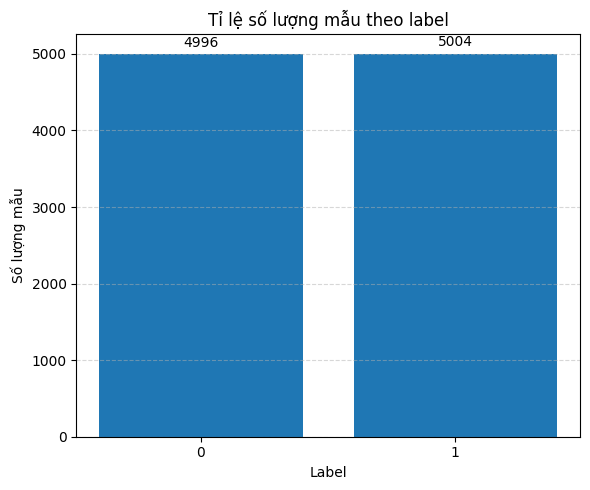

In [10]:
import matplotlib.pyplot as plt

class_counts = class_counts.sort_index()

fig, ax = plt.subplots(figsize=(6, 5))
bars = ax.bar(class_counts.index.astype(str), class_counts.values)

ax.set_title("Tỉ lệ số lượng mẫu theo label")
ax.set_xlabel("Label")
ax.set_ylabel("Số lượng mẫu")
ax.grid(axis="y", linestyle="--", alpha=0.5)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height}",
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha="center", va="bottom")

plt.tight_layout()
plt.show()


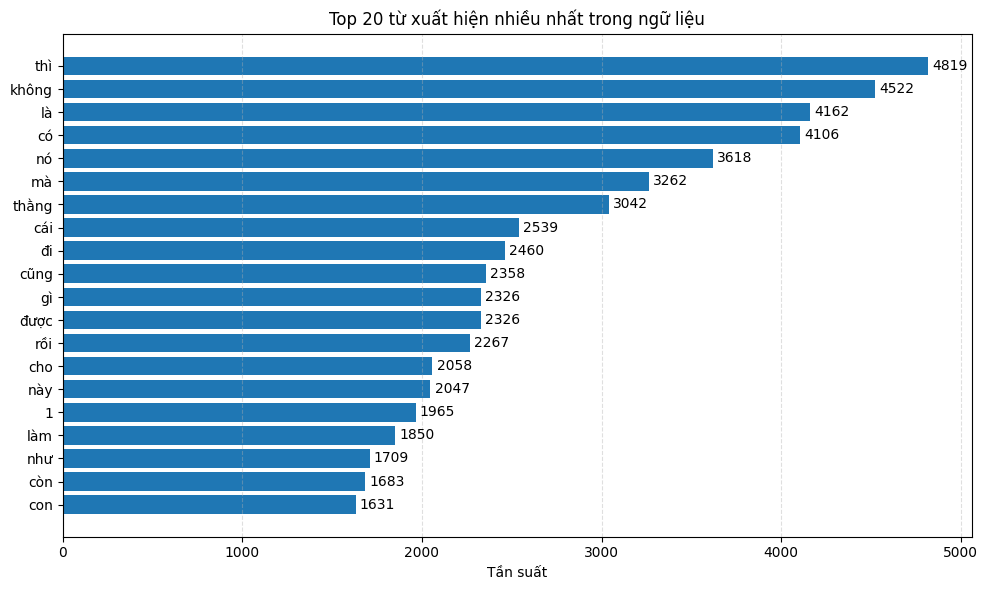

In [11]:
top20 = vocab.most_common(20)
words = [w for w, c in top20]
freqs = [c for w, c in top20]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(range(len(words)), freqs)
ax.set_yticks(range(len(words)))
ax.set_yticklabels(words)

ax.invert_yaxis()  # từ phổ biến nhất ở trên
ax.set_xlabel("Tần suất")
ax.set_title("Top 20 từ xuất hiện nhiều nhất trong ngữ liệu")
ax.grid(axis="x", linestyle="--", alpha=0.4)

for bar in bars:
    width = bar.get_width()
    ax.annotate(str(width),
                xy=(width, bar.get_y() + bar.get_height()/2),
                xytext=(3, 0),
                textcoords="offset points",
                va="center")

plt.tight_layout()
plt.show()


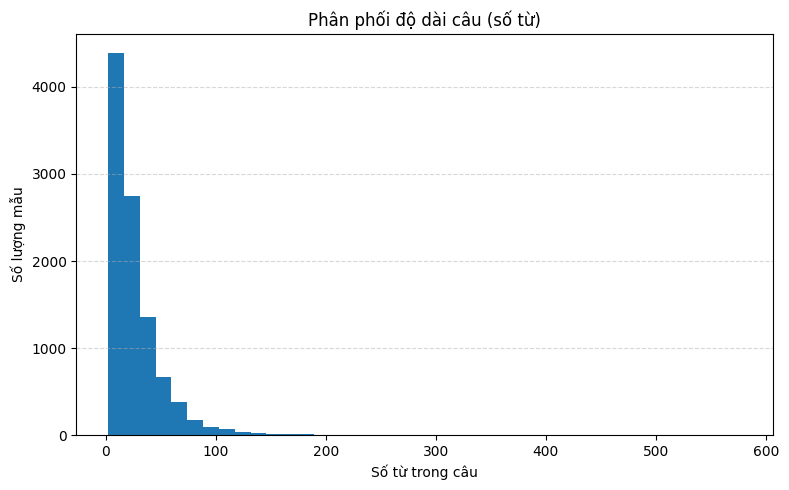

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(lengths, bins=40)
ax.set_title("Phân phối độ dài câu (số từ)")
ax.set_xlabel("Số từ trong câu")
ax.set_ylabel("Số lượng mẫu")
ax.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


Độ dài trung bình class 0: 26.65792634107286
Độ dài trung bình class 1: 27.223421262989607


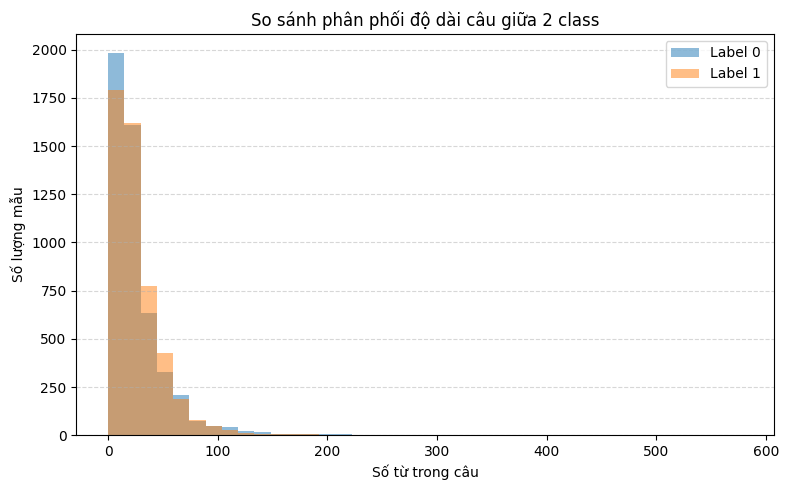

In [13]:
import numpy as np

lengths_0 = df[df["labels"] == 0]["tokens"].apply(len)
lengths_1 = df[df["labels"] == 1]["tokens"].apply(len)

print("Độ dài trung bình class 0:", lengths_0.mean())
print("Độ dài trung bình class 1:", lengths_1.mean())

bins = np.linspace(0, max(lengths.max(), 1), 40)

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(lengths_0, bins=bins, alpha=0.5, label="Label 0")
ax.hist(lengths_1, bins=bins, alpha=0.5, label="Label 1")

ax.set_title("So sánh phân phối độ dài câu giữa 2 class")
ax.set_xlabel("Số từ trong câu")
ax.set_ylabel("Số lượng mẫu")
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [14]:
vocab_0 = Counter()
vocab_1 = Counter()

for _, row in df.iterrows():
    if row["labels"] == 0:
        vocab_0.update(row["tokens"])
    else:
        vocab_1.update(row["tokens"])

print("Top 20 từ class 0:")
print(vocab_0.most_common(30))

print("\nTop 20 từ class 1:")
print(vocab_1.most_common(30))


Top 20 từ class 0:
[('không', 2636), ('thì', 2406), ('là', 2118), ('có', 2115), ('mà', 1469), ('nó', 1399), ('được', 1304), ('đi', 1262), ('cũng', 1234), ('rồi', 1188), ('mình', 920), ('cho', 919), ('1', 896), ('cái', 878), ('làm', 867), ('này', 866), ('em', 845), ('gì', 801), ('với', 778), ('tôi', 777), ('còn', 771), ('lại', 762), ('của', 725), ('người', 712), ('thôi', 707), ('phải', 689), ('anh', 687), ('ra', 685), ('mấy', 656), ('như', 638)]

Top 20 từ class 1:
[('thằng', 2544), ('thì', 2413), ('nó', 2219), ('là', 2044), ('có', 1991), ('không', 1886), ('mà', 1793), ('cái', 1661), ('gì', 1525), ('đi', 1198), ('này', 1181), ('cho', 1139), ('cũng', 1124), ('rồi', 1079), ('như', 1071), ('1', 1069), ('con', 1026), ('được', 1022), ('làm', 983), ('mấy', 971), ('đéo', 969), ('ra', 931), ('còn', 912), ('mẹ', 791), ('bọn', 764), ('mày', 759), ('người', 759), ('nào', 745), ('phải', 714), ('vào', 706)]


Tiếp theo là loại bỏ stopword và TF-IDF

In [15]:
stopwords = {
    "có", "rất", "tôi", "ở", "của", "là", "với", "cho", "được",
    "thì", "đã", "trong", "sẽ", "này", "đến",
    "và", "nhưng", "hay", "cũng", "lại", "đang", "đi", "gì",
    "nữa", "nên", "như", "khi", "này", "kia"
}
def remove_stopwords(tokens, sw):
    return [t for t in tokens if t not in sw]

df["tokens_nostop"] = df["tokens"].apply(lambda toks: remove_stopwords(toks, stopwords))
df[["tokens", "tokens_nostop"]].head(10)

,tokens,tokens_nostop
0,"[thanh_niên, thời, nay, toàn, game, gủng, bay,...","[thanh_niên, thời, nay, toàn, game, gủng, bay,..."
1,"[cán_bộ, là, nhàn, mẹ, nhất, lương, thấp, nhưn...","[cán_bộ, nhàn, mẹ, nhất, lương, thấp, đúng, ng..."
2,"[không, bị, đắng, hả, bác, chỉ, em, với]","[không, bị, đắng, hả, bác, chỉ, em]"
3,"[sáng, ra, đã, nhậu, nhất, các, thím, này]","[sáng, ra, nhậu, nhất, các, thím]"
4,"[có, xem, không, mà, phát_biểu, liều, h2_saka,...","[xem, không, mà, phát_biểu, liều, h2_saka, tìn..."
5,"[đời, tao, ghét, mấy, con, chó, như, thế_này, ...","[đời, tao, ghét, mấy, con, chó, thế_này, làm, ..."
6,"[ừ, nhưng, không, mang, khẩu_trang, là, phạt]","[ừ, không, mang, khẩu_trang, phạt]"
7,"[tụi, nó, không, chịu, chạy, các, friend, ạ, đ...","[tụi, nó, không, chịu, chạy, các, friend, ạ, đ..."
8,"[*, *, mẹ, lại, xứ_lờ, bắc_giang]","[*, *, mẹ, xứ_lờ, bắc_giang]"
9,"[trù, ếm, juv, dog, die, thua, trắng, ​]","[trù, ếm, juv, dog, die, thua, trắng, ​]"


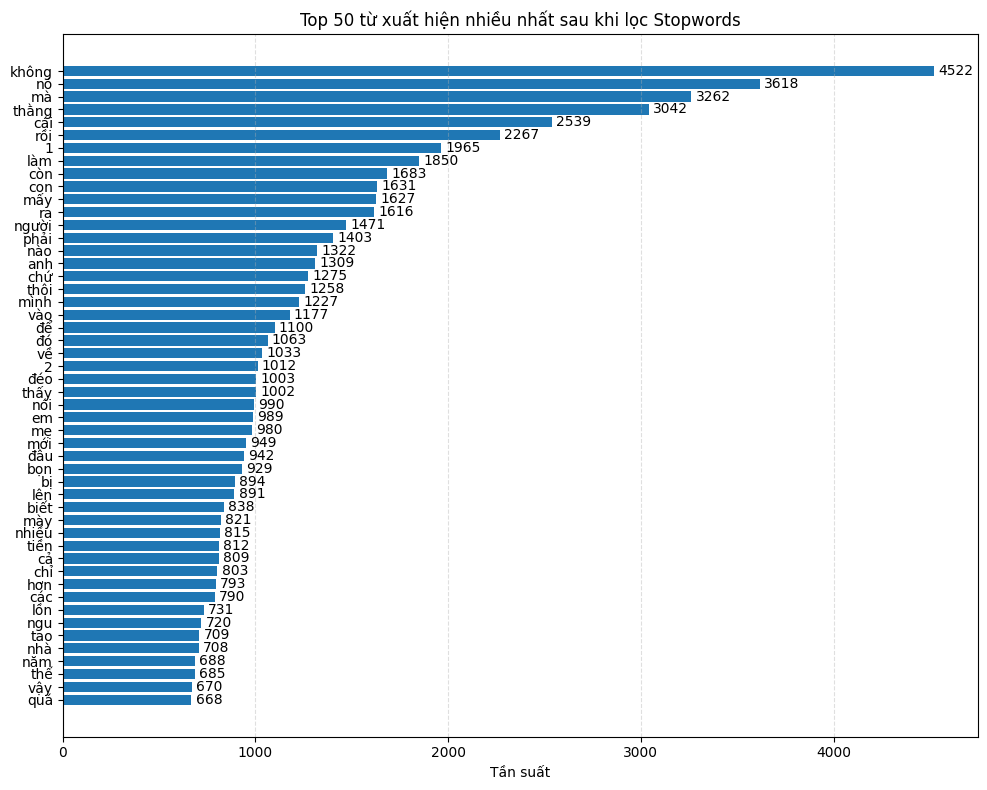

In [16]:
from collections import Counter
import matplotlib.pyplot as plt

vocab_nostop = Counter()
for toks in df["tokens_nostop"]:
    vocab_nostop.update(toks)

top50_nostop = vocab_nostop.most_common(50)
words_nostop = [w for w, c in top50_nostop]
freqs_nostop = [c for w, c in top50_nostop]

fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(range(len(words_nostop)), freqs_nostop)
ax.set_yticks(range(len(words_nostop)))
ax.set_yticklabels(words_nostop)

ax.invert_yaxis()  # từ phổ biến nhất ở trên
ax.set_xlabel("Tần suất")
ax.set_title("Top 50 từ xuất hiện nhiều nhất sau khi lọc Stopwords")
ax.grid(axis="x", linestyle="--", alpha=0.4)

for bar in bars:
    width = bar.get_width()
    ax.annotate(str(width),
                xy=(width, bar.get_y() + bar.get_height()/2),
                xytext=(3, 0),
                textcoords="offset points",
                va="center")

plt.tight_layout()
plt.show()

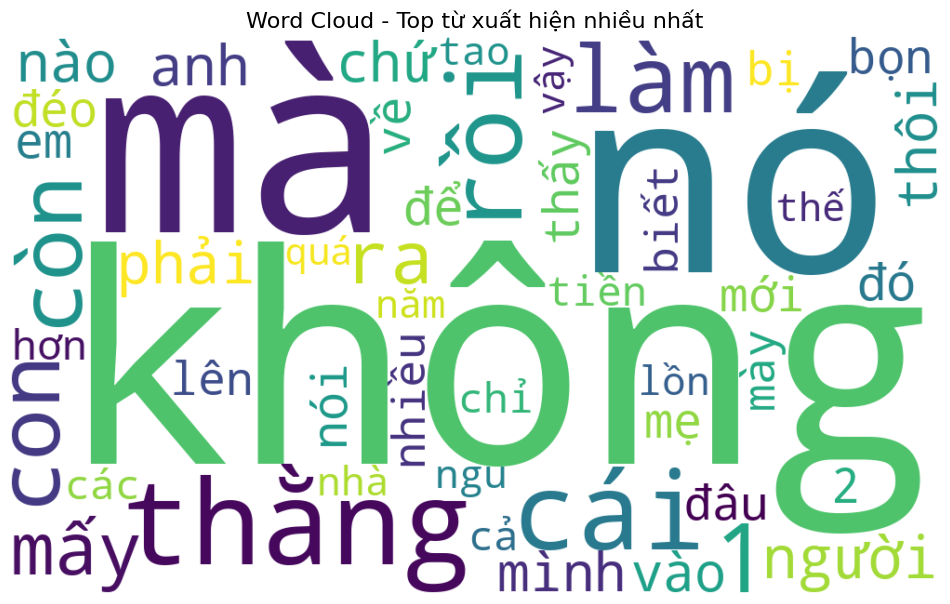

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Chuẩn bị dữ liệu
# Bạn đã có 'top50_nostop' là list các tuple [('từ', số_lượng), ...]
# Cần chuyển nó về dạng Dictionary để WordCloud hiểu: {'từ': số_lượng}
word_freq_dict = dict(top50_nostop)

# 2. Cấu hình WordCloud
# Lưu ý: Nếu chạy trên máy cá nhân/Colab mà thấy ô vuông thì cần thêm tham số font_path
wc = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    colormap='viridis',    # Màu sắc đẹp mắt hơn
    max_words=50,          # Giới hạn đúng 50 từ như bạn muốn
    # font_path='C:/Windows/Fonts/arial.ttf' # Bỏ comment dòng này nếu bị lỗi font tiếng Việt
)

# 3. Tạo mây từ từ dữ liệu tần suất
wc.generate_from_frequencies(word_freq_dict)

# 4. Vẽ hình
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off') # Tắt khung trục tọa độ cho đẹp
plt.title('Word Cloud - Top từ xuất hiện nhiều nhất', fontsize=16)
plt.show()

Gộp lại thành câu để dùng TF-IDF

In [18]:
df["texts_nostop"] = df["tokens_nostop"].apply(lambda toks: " ".join(toks))

df = df[df["tokens_nostop"].apply(len) > 0].reset_index(drop=True)

df.to_csv(data_dir + "/data_10k_nostop.csv", index=False)

df[["texts", "texts_tok", "tokens", "tokens_nostop", "texts_nostop", "labels"]].head(10)

,texts,texts_tok,tokens,tokens_nostop,texts_nostop,labels
0,thanh niên thời nay toàn game gủng bay lắc ăn ...,thanh_niên thời nay toàn game gủng bay lắc ăn_...,"[thanh_niên, thời, nay, toàn, game, gủng, bay,...","[thanh_niên, thời, nay, toàn, game, gủng, bay,...",thanh_niên thời nay toàn game gủng bay lắc ăn_...,1
1,cán bộ là nhàn mẹ nhất lương thấp nhưng đúng n...,cán_bộ là nhàn mẹ nhất lương thấp nhưng đúng n...,"[cán_bộ, là, nhàn, mẹ, nhất, lương, thấp, nhưn...","[cán_bộ, nhàn, mẹ, nhất, lương, thấp, đúng, ng...",cán_bộ nhàn mẹ nhất lương thấp đúng nghĩa chỉ ...,0
2,không bị đắng hả bác chỉ em với,không bị đắng hả bác chỉ em với,"[không, bị, đắng, hả, bác, chỉ, em, với]","[không, bị, đắng, hả, bác, chỉ, em]",không bị đắng hả bác chỉ em,0
3,sáng ra đã nhậu nhất các thím này,sáng ra đã nhậu nhất các thím này,"[sáng, ra, đã, nhậu, nhất, các, thím, này]","[sáng, ra, nhậu, nhất, các, thím]",sáng ra nhậu nhất các thím,0
4,có xem không mà phát biểu liều h2 saka có tình...,có xem không mà phát_biểu liều h2_saka có tình...,"[có, xem, không, mà, phát_biểu, liều, h2_saka,...","[xem, không, mà, phát_biểu, liều, h2_saka, tìn...",xem không mà phát_biểu liều h2_saka tình_huống...,0
5,đời tao ghét mấy con chó như thế này làm cái đ...,đời tao ghét mấy con chó như thế_này làm cái đ...,"[đời, tao, ghét, mấy, con, chó, như, thế_này, ...","[đời, tao, ghét, mấy, con, chó, thế_này, làm, ...",đời tao ghét mấy con chó thế_này làm cái đéo k...,1
6,ừ nhưng không mang khẩu trang là phạt,ừ nhưng không mang khẩu_trang là phạt,"[ừ, nhưng, không, mang, khẩu_trang, là, phạt]","[ừ, không, mang, khẩu_trang, phạt]",ừ không mang khẩu_trang phạt,0
7,tụi nó không chịu chạy các friend ạ đợi bóng đ...,tụi nó không chịu chạy các friend ạ đợi bóng đ...,"[tụi, nó, không, chịu, chạy, các, friend, ạ, đ...","[tụi, nó, không, chịu, chạy, các, friend, ạ, đ...",tụi nó không chịu chạy các friend ạ đợi bóng c...,1
8,** mẹ lại xứ lờ bắc giang,* * mẹ lại xứ_lờ bắc_giang,"[*, *, mẹ, lại, xứ_lờ, bắc_giang]","[*, *, mẹ, xứ_lờ, bắc_giang]",* * mẹ xứ_lờ bắc_giang,1
9,trù ếm juv dog die thua trắng ​,trù ếm juv dog die thua trắng ​,"[trù, ếm, juv, dog, die, thua, trắng, ​]","[trù, ếm, juv, dog, die, thua, trắng, ​]",trù ếm juv dog die thua trắng ​,0


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
X_text = df["texts_nostop"].astype(str)
y = df["labels"].astype(int)

print("Số mẫu:", len(df))
print(df[["texts_nostop", "labels"]].head(5))

# 2. TF-IDF trên TOÀN BỘ DATA
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),   # unigram + bigram
    max_df=0.9,           # bỏ feature xuất hiện > 90% câu
    min_df=5,             # chỉ giữ feature xuất hiện >= 5 câu
    sublinear_tf=True     # dùng 1 + log(tf)
)

X_all = tfidf.fit_transform(X_text)
feature_names = np.array(tfidf.get_feature_names_out())

print("TF-IDF shape (toàn bộ data):", X_all.shape)  # (n_samples, n_features)
print("Số feature:", len(feature_names))

Số mẫu: 10000
                                        texts_nostop  labels
0  thanh_niên thời nay toàn game gủng bay lắc ăn_...       1
1  cán_bộ nhàn mẹ nhất lương thấp đúng nghĩa chỉ ...       0
2                        không bị đắng hả bác chỉ em       0
3                         sáng ra nhậu nhất các thím       0
4  xem không mà phát_biểu liều h2_saka tình_huống...       0
TF-IDF shape (toàn bộ data): (10000, 8480)
Số feature: 8480


# SVM

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, text_train, text_test = train_test_split(
    X_all,
    y,
    X_text,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape, " | Test:", X_test.shape)

Train: (8000, 8480)  | Test: (2000, 8480)


In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# mô hình cơ bản
svc = SVC()

param_grid = {
    "kernel": ["linear", "rbf"],
    "C": [0.5, 1.0, 1.2, 2.0]
    # nếu muốn có gamma cho RBF:
    # "gamma": ["scale", 0.1, 0.01]
}

grid = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

# mô hình SVM tốt nhất sau fine-tune
best_svm = grid.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params: {'C': 0.5, 'kernel': 'linear'}
Best CV accuracy: 0.8794999999999998


Test accuracy: 0.8545

Classification report:
              precision    recall  f1-score   support

           0     0.8417    0.8729    0.8570       999
           1     0.8683    0.8362    0.8519      1001

    accuracy                         0.8545      2000
   macro avg     0.8550    0.8545    0.8545      2000
weighted avg     0.8550    0.8545    0.8545      2000

Confusion matrix:
[[872 127]
 [164 837]]


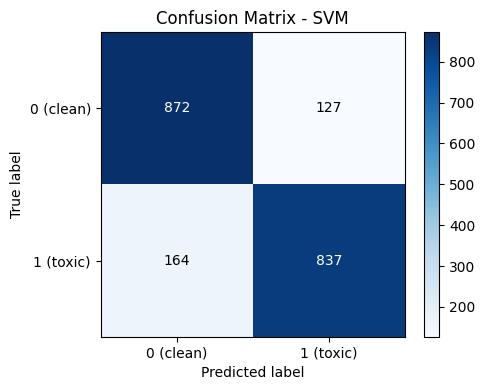

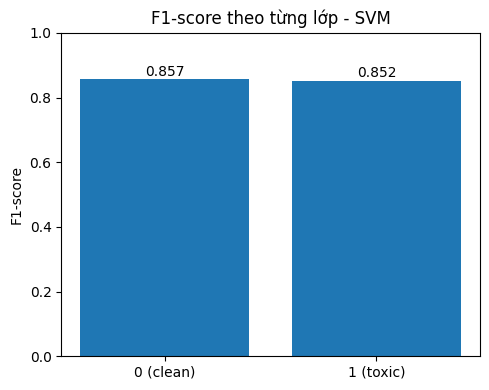

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# ====== Dự đoán ======
y_pred = best_svm.predict(X_test)

# ====== In số liệu cơ bản ======
acc = accuracy_score(y_test, y_pred)
print("Test accuracy:", acc)

report = classification_report(y_test, y_pred, digits=4)
print("\nClassification report:")
print(report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# ====== Vẽ Confusion Matrix ======
classes = ["0 (clean)", "1 (toxic)"]

fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(cm, interpolation="nearest", cmap="Blues")
ax.figure.colorbar(im, ax=ax)

ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=classes,
    yticklabels=classes,
    xlabel="Predicted label",
    ylabel="True label",
    title="Confusion Matrix - SVM"
)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, format(cm[i, j], "d"),
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black"
        )

fig.tight_layout()
plt.show()

# ====== Vẽ F1-score theo từng lớp ======
report_dict = classification_report(y_test, y_pred, output_dict=True)
f1_0 = report_dict["0"]["f1-score"]
f1_1 = report_dict["1"]["f1-score"]

fig, ax = plt.subplots(figsize=(5, 4))
ax.bar(["0 (clean)", "1 (toxic)"], [f1_0, f1_1])
ax.set_ylim(0, 1)
ax.set_ylabel("F1-score")
ax.set_title("F1-score theo từng lớp - SVM")
for i, v in enumerate([f1_0, f1_1]):
    ax.text(i, v + 0.01, f"{v:.3f}", ha="center")
plt.tight_layout()
plt.show()


#phoBERT

In [23]:
def basic_clean_for_phobert(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    # bỏ bớt mấy kí tự rác kiểu *, _, = cho đỡ loạn, giữ lại dấu chấm phẩy nếu muốn
    text = re.sub(r"[\*\_\=\+]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["text_clean_pho"] = df["texts"].apply(basic_clean_for_phobert)

# 2. ĐỌC TỪ ĐIỂN TEENCODE (file .txt cách nhau bằng TAB)
teencode_path = os.path.join(data_dir, "teencode.txt")

teen_dict = {}
with open(teencode_path, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        parts = line.split("\t", 1)   # slang \t standard
        if len(parts) != 2:
            continue
        slang, standard = parts
        slang = slang.lower().strip()
        standard = re.sub(r"\s+", " ", standard.strip())
        teen_dict[slang] = standard

# 3. CHUẨN HOÁ TEENCODE TRÊN CÂU ĐÃ CLEAN
def normalize_teencode_line(text, mapping):
    if not text:
        return ""
    words = text.split()
    new_words = []
    for w in words:
        if w in mapping:
            repl = mapping[w]          # "bme" -> "bố mẹ"
            new_words.extend(repl.split())
        else:
            new_words.append(w)
    return " ".join(new_words)

df["texts_phobert"] = df["text_clean_pho"].apply(
    lambda x: normalize_teencode_line(x, teen_dict)
)

df[["texts", "text_clean_pho", "texts_phobert", "labels"]].head(10)

,texts,text_clean_pho,texts_phobert,labels
0,thanh niên thời nay toàn game gủng bay lắc ăn ...,thanh niên thời nay toàn game gủng bay lắc ăn ...,thanh niên thời nay toàn game gủng bay lắc ăn ...,1
1,cán bộ là nhàn mẹ nhất lương thấp nhưng đúng n...,cán bộ là nhàn mẹ nhất lương thấp nhưng đúng n...,cán bộ là nhàn mẹ nhất lương thấp nhưng đúng n...,0
2,không bị đắng hả bác chỉ em với,không bị đắng hả bác chỉ em với,không bị đắng hả bác chỉ em với,0
3,sáng ra đã nhậu nhất các thím này,sáng ra đã nhậu nhất các thím này,sáng ra đã nhậu nhất các thím này,0
4,có xem không mà phát biểu liều h2 saka có tình...,có xem không mà phát biểu liều h2 saka có tình...,có xem không mà phát biểu liều h2 saka có tình...,0
5,đời tao ghét mấy con chó như thế này làm cái đ...,đời tao ghét mấy con chó như thế này làm cái đ...,đời tao ghét mấy con chó như thế này làm cái đ...,1
6,ừ nhưng không mang khẩu trang là phạt,ừ nhưng không mang khẩu trang là phạt,ừ nhưng không mang khẩu trang là phạt,0
7,tụi nó không chịu chạy các friend ạ đợi bóng đ...,tụi nó không chịu chạy các friend ạ đợi bóng đ...,tụi nó không chịu chạy các friend ạ đợi bóng đ...,1
8,** mẹ lại xứ lờ bắc giang,mẹ lại xứ lờ bắc giang,mẹ lại xứ lờ bắc giang,1
9,trù ếm juv dog die thua trắng ​,trù ếm juv dog die thua trắng ​,trù ếm juv dog die thua trắng ​,0


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

# df đã có texts_norm, tokens, texts_nostop (đã bỏ stopword)
# Nhưng PhoBERT NÊN dùng texts_norm (KHÔNG dùng tokens_nostop)
# vì tokenizer của PhoBERT tự xử lý subword.

texts = df["texts_phobert"].astype(str).tolist()
labels = df["labels"].tolist()

# Tách 60-20-20
texts_train, texts_temp, labels_train, labels_temp = train_test_split(
    texts, labels, test_size=0.4, random_state=42, stratify=labels
)

texts_val, texts_test, labels_val, labels_test = train_test_split(
    texts_temp, labels_temp, test_size=0.5, random_state=42, stratify=labels_temp
)

print("Train:", len(texts_train))
print("Val  :", len(texts_val))
print("Test :", len(texts_test))


Train: 6000
Val  : 2000
Test : 2000


In [25]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")

MAX_LEN = 128

def encode_batch(text_list):
    return tokenizer(
        text_list,
        padding="max_length",        # thêm [PAD] để đủ độ dài
        truncation=True,             # cắt nếu dài quá
        max_length=MAX_LEN,
        add_special_tokens=True,     # thêm [CLS], [SEP]
        return_attention_mask=True,
        return_tensors="pt"          # trả về tensor PyTorch
    )

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/678 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

bpe.codes: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [26]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Encode train / val / test
train_enc = encode_batch(texts_train)
val_enc   = encode_batch(texts_val)
test_enc  = encode_batch(texts_test)

# TensorDataset
train_dataset = TensorDataset(
    train_enc["input_ids"],
    train_enc["attention_mask"],
    torch.tensor(labels_train)
)

val_dataset = TensorDataset(
    val_enc["input_ids"],
    val_enc["attention_mask"],
    torch.tensor(labels_val)
)

test_dataset = TensorDataset(
    test_enc["input_ids"],
    test_enc["attention_mask"],
    torch.tensor(labels_test)
)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [27]:
import torch.nn as nn
from transformers import AutoModel

num_classes = 2  # binary toxic classification

phobert = AutoModel.from_pretrained("vinai/phobert-base-v2")

class PhoBERT_Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.phobert = phobert            # backbone
        hidden_size = 768                 # phobert-base-v2 hidden dim
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.phobert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        last_hidden_state = outputs.last_hidden_state  # (batch, seq, dim)
        cls_token = last_hidden_state[:, 0, :]         # lấy embedding CLS
        logits = self.fc(cls_token)
        return logits


pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
import torch
import torch.nn as nn
from torch.optim import Adam
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = PhoBERT_Classifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=2e-5)

EPOCHS = 3

for epoch in range(EPOCHS):
    # ====== TRAIN ======
    model.train()
    train_loss = 0.0
    train_preds = []
    train_trues = []

    for batch in train_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]

        optimizer.zero_grad()
        logits = model(input_ids, attention_mask)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        preds = torch.argmax(logits, dim=1)
        train_preds.extend(preds.detach().cpu().numpy())
        train_trues.extend(labels.detach().cpu().numpy())

    avg_train_loss = train_loss / len(train_loader)
    train_acc = accuracy_score(train_trues, train_preds)

    # ====== VALIDATION ======
    model.eval()
    val_loss = 0.0
    val_preds = []
    val_trues = []

    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = [x.to(device) for x in batch]

            logits = model(input_ids, attention_mask)
            loss = criterion(logits, labels)

            val_loss += loss.item()

            preds = torch.argmax(logits, dim=1)
            val_preds.extend(preds.detach().cpu().numpy())
            val_trues.extend(labels.detach().cpu().numpy())

    avg_val_loss = val_loss / len(val_loader)
    val_acc = accuracy_score(val_trues, val_preds)

    print(
        f"Epoch {epoch+1}/{EPOCHS} | "
        f"Train loss: {avg_train_loss:.4f}  acc: {train_acc:.4f} | "
        f"Val loss: {avg_val_loss:.4f}  acc: {val_acc:.4f}"
    )


model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

Epoch 1/3 | Train loss: 0.2947  acc: 0.8803 | Val loss: 0.2267  acc: 0.9045
Epoch 2/3 | Train loss: 0.1889  acc: 0.9307 | Val loss: 0.3053  acc: 0.8870
Epoch 3/3 | Train loss: 0.1205  acc: 0.9580 | Val loss: 0.3031  acc: 0.9030


Test Accuracy: 0.906
              precision    recall  f1-score   support

           0     0.9491    0.8579    0.9012       999
           1     0.8706    0.9540    0.9104      1001

    accuracy                         0.9060      2000
   macro avg     0.9098    0.9060    0.9058      2000
weighted avg     0.9098    0.9060    0.9058      2000

Confusion matrix:
[[857 142]
 [ 46 955]]


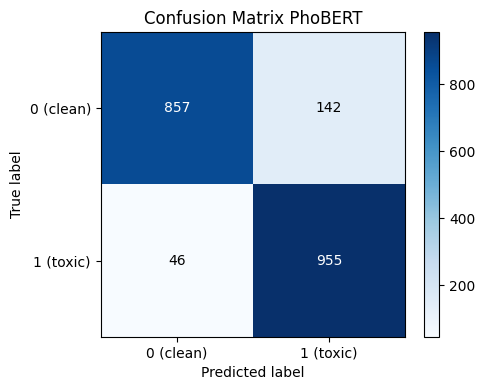

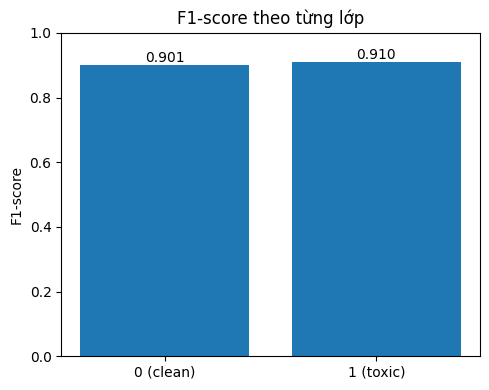

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# ====== Dự đoán trên test set ======
model.eval()
preds = []
trues = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]

        logits = model(input_ids, attention_mask)
        pred = torch.argmax(logits, dim=1)

        preds.extend(pred.cpu().numpy())
        trues.extend(labels.cpu().numpy())

# ====== In số liệu cơ bản ======
acc = accuracy_score(trues, preds)
print("Test Accuracy:", acc)

report = classification_report(trues, preds, digits=4)
print(report)

cm = confusion_matrix(trues, preds)
print("Confusion matrix:")
print(cm)

# ====== Vẽ Confusion Matrix ======
classes = ["0 (clean)", "1 (toxic)"]

fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(cm, interpolation="nearest", cmap="Blues")
ax.figure.colorbar(im, ax=ax)
ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=classes,
    yticklabels=classes,
    xlabel="Predicted label",
    ylabel="True label",
    title="Confusion Matrix PhoBERT"
)

# ghi số lên từng ô
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, format(cm[i, j], "d"),
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black"
        )

fig.tight_layout()
plt.show()

# ====== Vẽ F1-score theo từng lớp ======
report_dict = classification_report(trues, preds, output_dict=True)
f1_0 = report_dict["0"]["f1-score"]
f1_1 = report_dict["1"]["f1-score"]

fig, ax = plt.subplots(figsize=(5, 4))
ax.bar(["0 (clean)", "1 (toxic)"], [f1_0, f1_1])
ax.set_ylim(0, 1)
ax.set_ylabel("F1-score")
ax.set_title("F1-score theo từng lớp")
for i, v in enumerate([f1_0, f1_1]):
    ax.text(i, v + 0.01, f"{v:.3f}", ha="center")
plt.tight_layout()
plt.show()



In [30]:
import torch
import torch.nn.functional as F

# Hàm tiền xử lý giống pipeline train
def preprocess_for_phobert(raw_text):
    # clean nhẹ + lower
    text_clean = basic_clean_for_phobert(raw_text)
    # chuẩn hoá teencode
    text_norm = normalize_teencode_line(text_clean, teen_dict)
    return text_norm

def predict_one(raw_text):
    model.eval()

    # 1. Tiền xử lý
    text = preprocess_for_phobert(raw_text)
    print("Sau khi chuẩn hoá:", text)

    # 2. Tokenize
    encoded = tokenizer(
        text,
        padding="max_length",
        truncation=True,
        max_length=128,          # đúng MAX_LEN bạn dùng khi train
        add_special_tokens=True,
        return_attention_mask=True,
        return_tensors="pt"
    )

    input_ids = encoded["input_ids"].to(device)
    attention_mask = encoded["attention_mask"].to(device)

    # 3. Dự đoán
    with torch.no_grad():
        logits = model(input_ids, attention_mask)
        probs = F.softmax(logits, dim=1).cpu().numpy()[0]

    pred_label = int(probs.argmax())
    print(f"Prob class 0 (clean): {probs[0]:.4f}")
    print(f"Prob class 1 (toxic): {probs[1]:.4f}")
    print("==> Kết luận:", "TOXIC (1)" if pred_label == 1 else "CLEAN (0)")

    return pred_label, probs

# Ví dụ thử
test_text = "Não của bạn chắc tốn ít năng lượng lắm nhỉ"
predict_one(test_text)


Sau khi chuẩn hoá: não của bạn chắc tốn ít năng lượng lắm nhỉ
Prob class 0 (clean): 0.9907
Prob class 1 (toxic): 0.0093
==> Kết luận: CLEAN (0)


(0, array([0.9907259 , 0.00927415], dtype=float32))

In [33]:
# 1. Kiểm tra xem biến chứa PhoBERT gốc tên là gì
# Thông thường trong class tự viết, người ta hay đặt là self.bert hoặc self.phobert
# Bạn có thể in model ra để xem: print(model)
# Giả sử trong class bạn đặt tên nó là 'phobert' (hoặc 'bert', 'roberta'...)

# --- ĐOẠN CODE SỬA ---

# Truy cập trực tiếp vào tầng PhoBERT gốc (Backbone)
# Nếu code báo lỗi 'AttributeError', hãy đổi .phobert thành .bert hoặc .roberta tùy cách bạn đặt tên trong class
base_model = model.phobert

base_model.eval()
with torch.no_grad():
    # Gọi trực tiếp backbone sẽ chấp nhận output_attentions=True
    # Và chúng ta truyền tham số rõ ràng để tránh lỗi 'token_type_ids'
    outputs = base_model(
        input_ids=inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        output_attentions=True
    )

    # Lấy attention thành công
    attention = outputs.attentions

print("Đã lấy được Attention! Shape lớp cuối:", attention[-1].shape)
# Giờ bạn có thể chạy tiếp đoạn vẽ hình

RobertaSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


Đã lấy được Attention! Shape lớp cuối: torch.Size([1, 12, 26, 26])


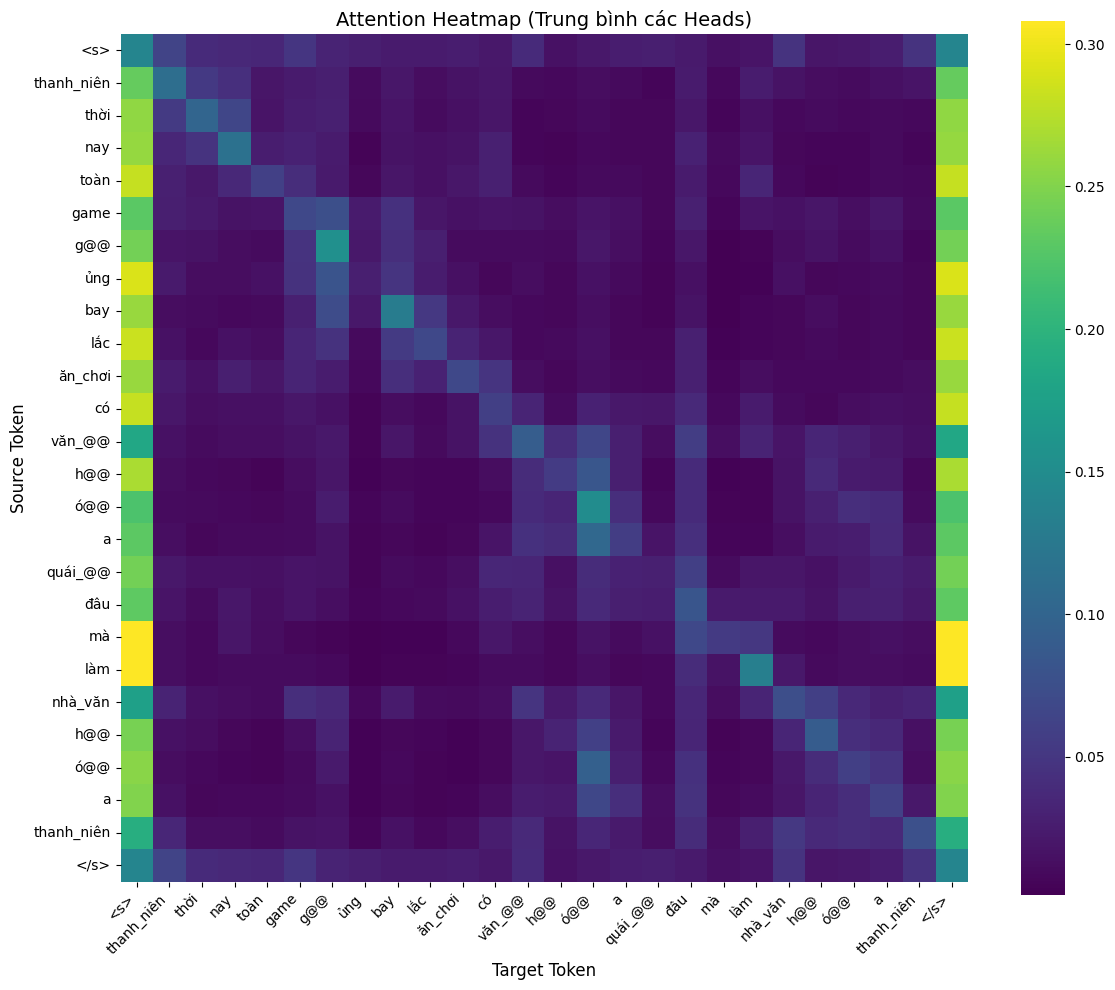

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Lấy danh sách token để gán nhãn trục
# (Biến 'inputs' và 'tokenizer' lấy từ cell bạn vừa chạy thành công)
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

# 2. Xử lý dữ liệu Attention
# Lấy lớp cuối cùng [-1], bỏ batch [0], trung bình các head [mean(0)]
last_layer_attn = attention[-1].squeeze(0).mean(dim=0).detach().cpu().numpy()

# 3. Vẽ Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(last_layer_attn,
            xticklabels=tokens,
            yticklabels=tokens,
            cmap="viridis",
            annot=False, # Đổi thành True nếu muốn hiện số (hơi rối)
            square=True)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Attention Heatmap (Trung bình các Heads)", fontsize=14)
plt.xlabel("Target Token", fontsize=12)
plt.ylabel("Source Token", fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Đảm bảo về numpy array cho dễ xử lý
trues_arr = np.array(trues)
preds_arr = np.array(preds)
texts_arr = np.array(texts_test)   # list -> array

# Tìm index các mẫu dự đoán sai
mis_idx = np.where(trues_arr != preds_arr)[0]
print("Tổng số mẫu dự đoán sai:", len(mis_idx))

# Lấy tối đa 20 mẫu sai (hoặc ít hơn nếu không đủ)
n_show = min(50, len(mis_idx))
print(f"\nHiển thị {n_show} mẫu dự đoán sai:\n")

rand_idx = np.random.choice(mis_idx, size=n_show, replace=False)
for i, idx in enumerate(rand_idx, start=1):
    print(f"=== Mẫu {i} (index {idx}) ===")
    print(f"Text      : {texts_arr[idx]}")
    print(f"True label: {trues_arr[idx]}")
    print(f"Pred label: {preds_arr[idx]}")
    print()


In [ ]:
import os
import torch

# 1. Định nghĩa thư mục lưu
output_dir = './saved_model'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Đang lưu model và tokenizer...")

# 2. Lưu trọng số Model (File .pth)
# Chỉ lưu trọng số (state_dict) cho nhẹ và ít lỗi version
torch.save(model.state_dict(), os.path.join(output_dir, 'phobert_toxic.pth'))

# 3. Lưu Tokenizer (File config, vocab...)
# Cái này bắt buộc phải có để máy tính hiểu cách tách từ giống hệt lúc train
tokenizer.save_pretrained(output_dir)

# 4. Lưu class config (Nếu cần thiết, nhưng PhoBERT thường có sẵn config online)
# model.phobert.config.save_pretrained(output_dir)

print(f"XONG! Model đã được lưu tại: {output_dir}")
print("Hãy tải toàn bộ file trong thư mục này về máy tính.")